# Import libraries and updated data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Import most updated version of data - this will be the dataframe of only "regular activity customers" from part 1 of Task 4.10 as these are the only customers that Instacart executives will be concerned with. Continuing with the set that excludes customers who have ordered under 5 items from Instacart

In [3]:
#Python shortcut for importing files, create string & assign to variable 
path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 4/07-2022 Instacart Basket Analysis'

In [4]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 4/07-2022 Instacart Basket Analysis'

In [5]:
#import the pkl file of only regular activity customers
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'regular_activity_customers.pkl'))

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,#_of_dependants,marital_status,income,region,total_orders,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity


# Create customer profiles

# a. Age Profile

In [7]:
#Create age flags for young adult (18-35 years), middle-aged adult (36-55 years), older adults (56+ years)

df.loc[df['age']<=35, 'age_group']='young adult'
df.loc[(df['age']<=55)&(df['age']>35), 'age_group']='middle-aged adult'
df.loc[df['age']>55, 'age_group']='older adult'


In [8]:
df['age_group'].value_counts(dropna=False)

older adult          13091042
middle-aged adult    10165327
young adult           9145606
Name: age_group, dtype: int64

The majority of customers call in the older adult age range of 55+ years old, but the difference between each age grouping is not very large.

# b. Income Profile

In [9]:
# create income category flags

df.loc[df['income']<50000, 'income_flag'] = 'low income'
df.loc[(df['income']>=50000) & (df['income']<=120000), 'income_flag'] = 'middle income' 
df.loc[df['income']>120000, 'income_flag'] = 'high income'


In [10]:
#check counts
df['income_flag'].value_counts(dropna = False)

middle income    19238403
high income       9570582
low income        3592990
Name: income_flag, dtype: int64

The majority of customers fall in the middle bracket of 50k-120k income level

# c. Number of Dependants Profile

In [11]:
#Create flag for has dependants/no dependants: number of dependants>0- has dependants, otherwise - no dependants

df.loc[df['#_of_dependants']>0, 'dependant_status']='has dependants'
df.loc[df['#_of_dependants']==0,'dependant_status']='no dependants'


In [12]:
df['dependant_status'].value_counts(dropna=False)

has dependants    24305226
no dependants      8096749
Name: dependant_status, dtype: int64

More Instacart customers have dependants than customers that do not.

# d. Department-specific variables

In [13]:
#Import department_wrangled.csv to check department id's
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv'))

In [14]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [15]:
# Create data dictionary for department id

zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)


In [16]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [17]:
# Map  department names to department ID in df
df['department'] = df['department_id'].map(data_dict)

In [18]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,#_of_dependants,marital_status,income,region,total_orders,activity_flag,age_group,income_flag,dependant_status,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages


# Pet parents subset

In [19]:
# Create pet parents subset

pet_parents = df.loc[df['department']=='pets']

In [20]:
pet_parents.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,#_of_dependants,marital_status,income,region,total_orders,activity_flag,age_group,income_flag,dependant_status,department
1495,659764,109,4,2,5,20.0,False,36273,9,0,...,1,married,41805,Northeast,69,Regular Activity,older adult,low income,has dependants,pets
1496,3116901,109,5,0,7,26.0,False,36273,3,1,...,1,married,41805,Northeast,69,Regular Activity,older adult,low income,has dependants,pets
2791,1439283,290,2,6,14,7.0,False,25860,8,0,...,1,married,55550,Midwest,1590,Regular Activity,young adult,middle income,has dependants,pets
2792,3080196,290,3,6,12,7.0,False,25860,21,1,...,1,married,55550,Midwest,1590,Regular Activity,young adult,middle income,has dependants,pets
2793,2881272,290,4,6,10,7.0,False,25860,7,1,...,1,married,55550,Midwest,1590,Regular Activity,young adult,middle income,has dependants,pets


In [21]:
#consider pet parent expenditure by using aggregation 

pet_parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
pets        7.889181  1.0  15.0

# Parent of baby subset

In [22]:
# Create subset for customers who have purchased baby products
baby_parents = df.loc[df['department']=='babies']

In [23]:
baby_parents.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,#_of_dependants,marital_status,income,region,total_orders,activity_flag,age_group,income_flag,dependant_status,department
1508,1382150,109,6,1,9,15.0,False,3858,5,0,...,1,married,41805,Northeast,69,Regular Activity,older adult,low income,has dependants,babies
2893,2684151,290,22,6,10,7.0,False,45309,32,0,...,1,married,55550,Midwest,1590,Regular Activity,young adult,middle income,has dependants,babies
3508,2684151,290,22,6,10,7.0,False,15076,33,0,...,1,married,55550,Midwest,1590,Regular Activity,young adult,middle income,has dependants,babies
3982,2332460,420,21,5,17,11.0,False,14408,1,0,...,2,married,97248,West,123,Regular Activity,young adult,middle income,has dependants,babies
4030,58188,420,3,6,13,23.0,False,30161,7,0,...,2,married,97248,West,123,Regular Activity,young adult,middle income,has dependants,babies


In [24]:
# look at baby parent expenditure through aggregation

baby_parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
babies      7.638374  1.0  15.0

In [25]:
# consider the most lucrative departments
df[['prices', 'department']].groupby('department').agg('sum').sort_values(by ='prices', ascending=False)

,prices
department,
dairy eggs,180644624.2
produce,75656922.6
beverages,20641141.2
frozen,17287788.3
pantry,15019386.3
snacks,12344405.5
meat seafood,11550802.4
bakery,9207464.0
deli,8176975.6


Customers spend the most money in the department "dairy eggs"

# Create appropriate visualizations to show the distribution of profiles

In [26]:
# first, create a new subset that excludes duplicates

df_no_dups = df.drop_duplicates(subset='user_id')

In [27]:
df.shape

(32401975, 38)

In [28]:
df_no_dups.shape

(205410, 38)

# a. Age Profile Distribution Visualization

Text(0, 0.5, 'Number of customers')

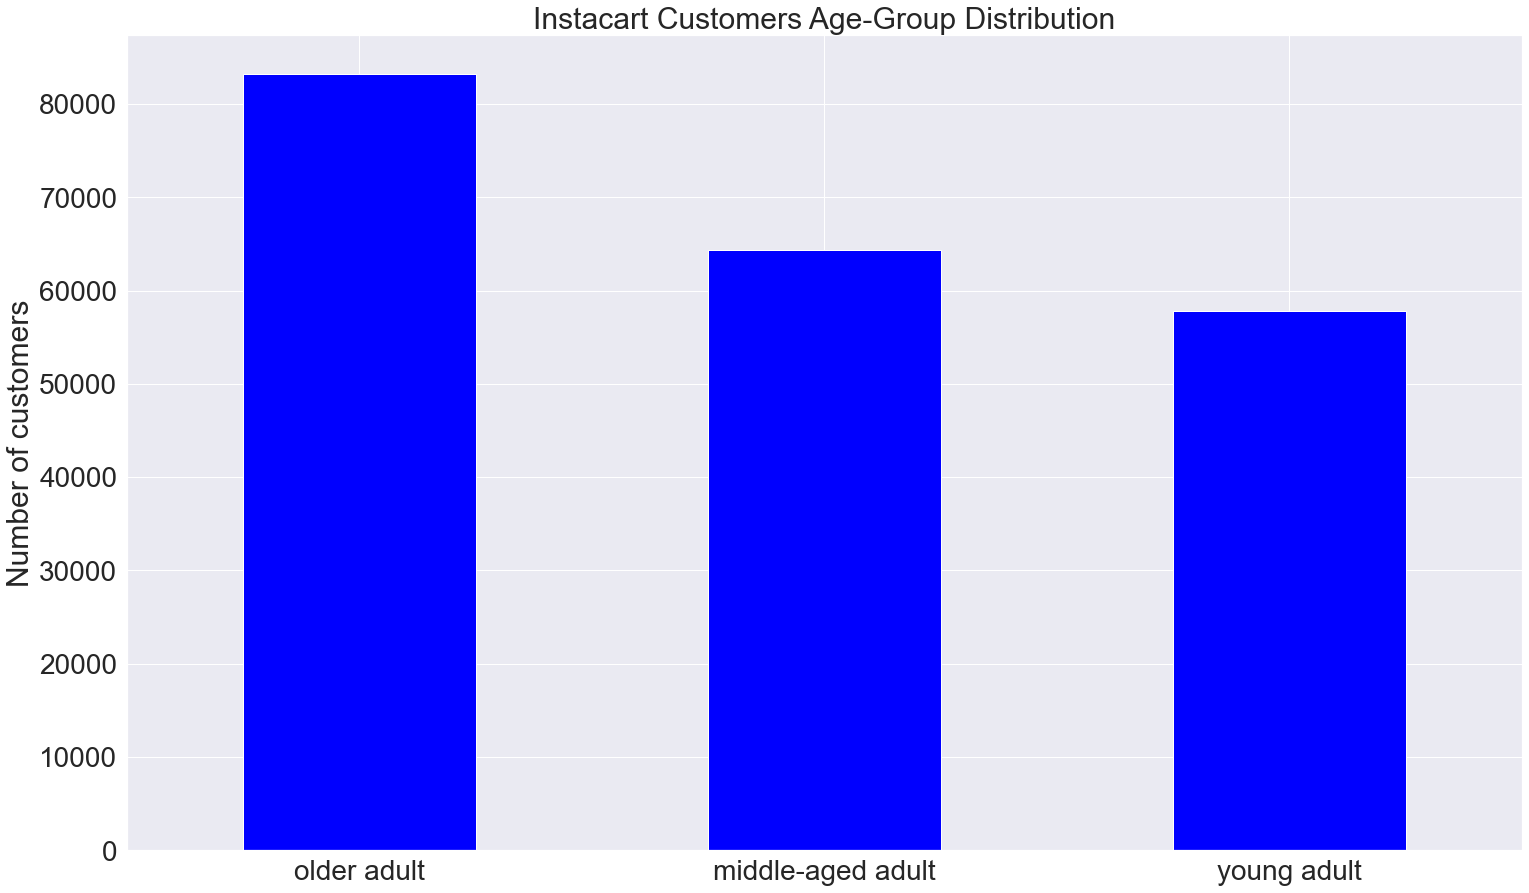

In [139]:
#Create bar chart for age distribution of customers
sns.set(rc = {'figure.figsize':(25,15)})
age_bar = df_no_dups['age_group'].value_counts().plot.bar(color='blue', fontsize=28, rot=0)
plt.title('Instacart Customers Age-Group Distribution', fontsize=30)
plt.ylabel('Number of customers', fontsize=30)

# b. Income Profile Distribution Visualization

Text(0, 0.5, '# of customers')

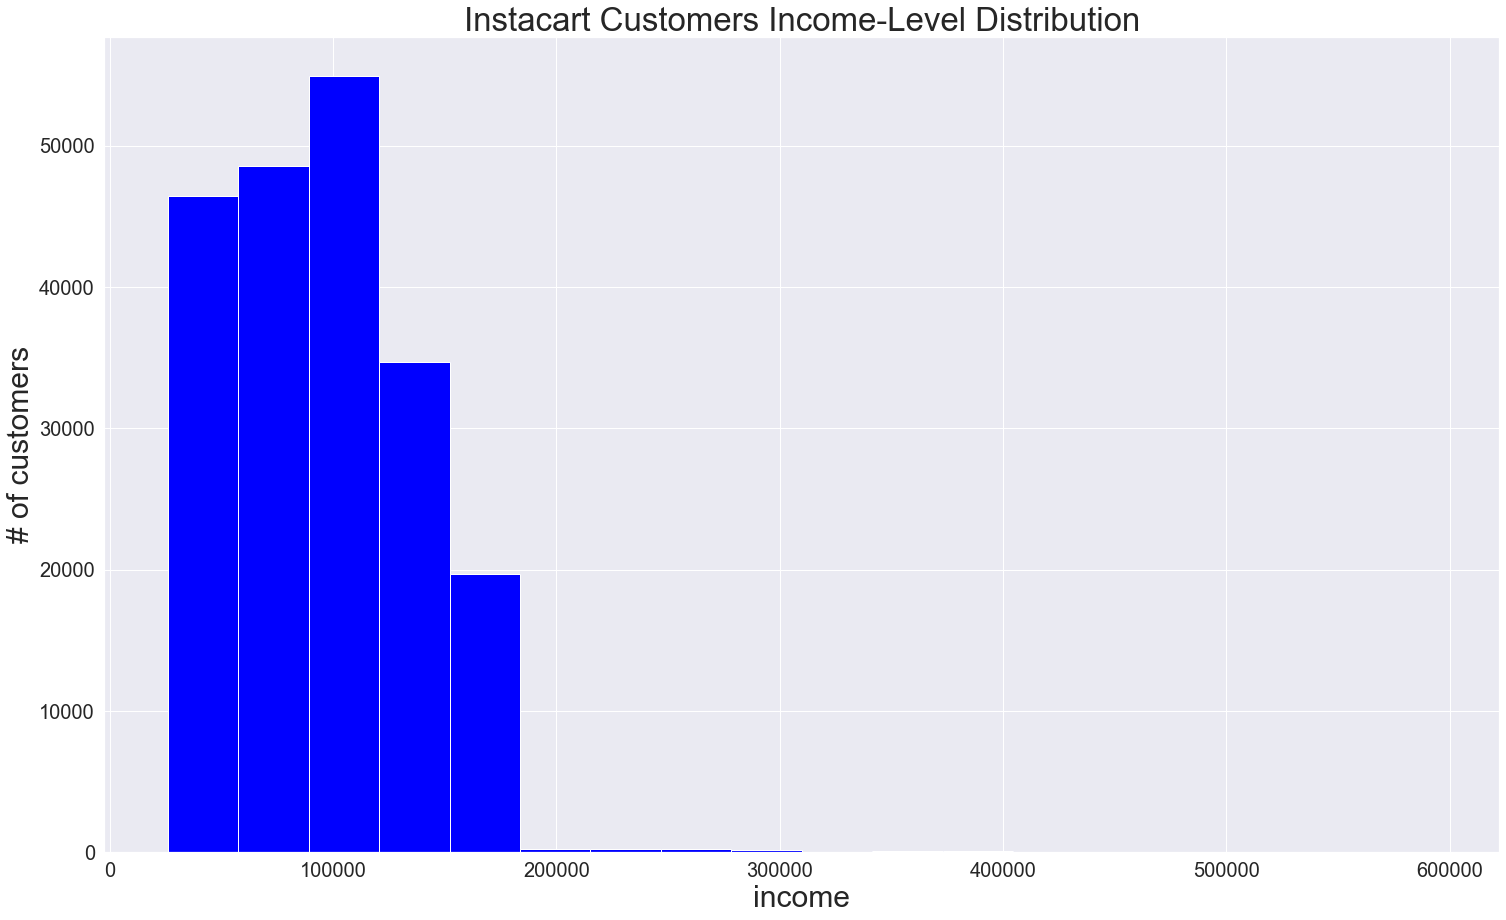

In [142]:
#Create a histogram of customer income level distribution

income_hist = df_no_dups['income'].plot.hist(bins=18, color='blue', fontsize=20)
plt.title('Instacart Customers Income-Level Distribution', fontsize=33)
plt.xlabel('income', fontsize=30)
plt.ylabel('# of customers', fontsize=30)

# c. Dependant Profile Distribution Visualization

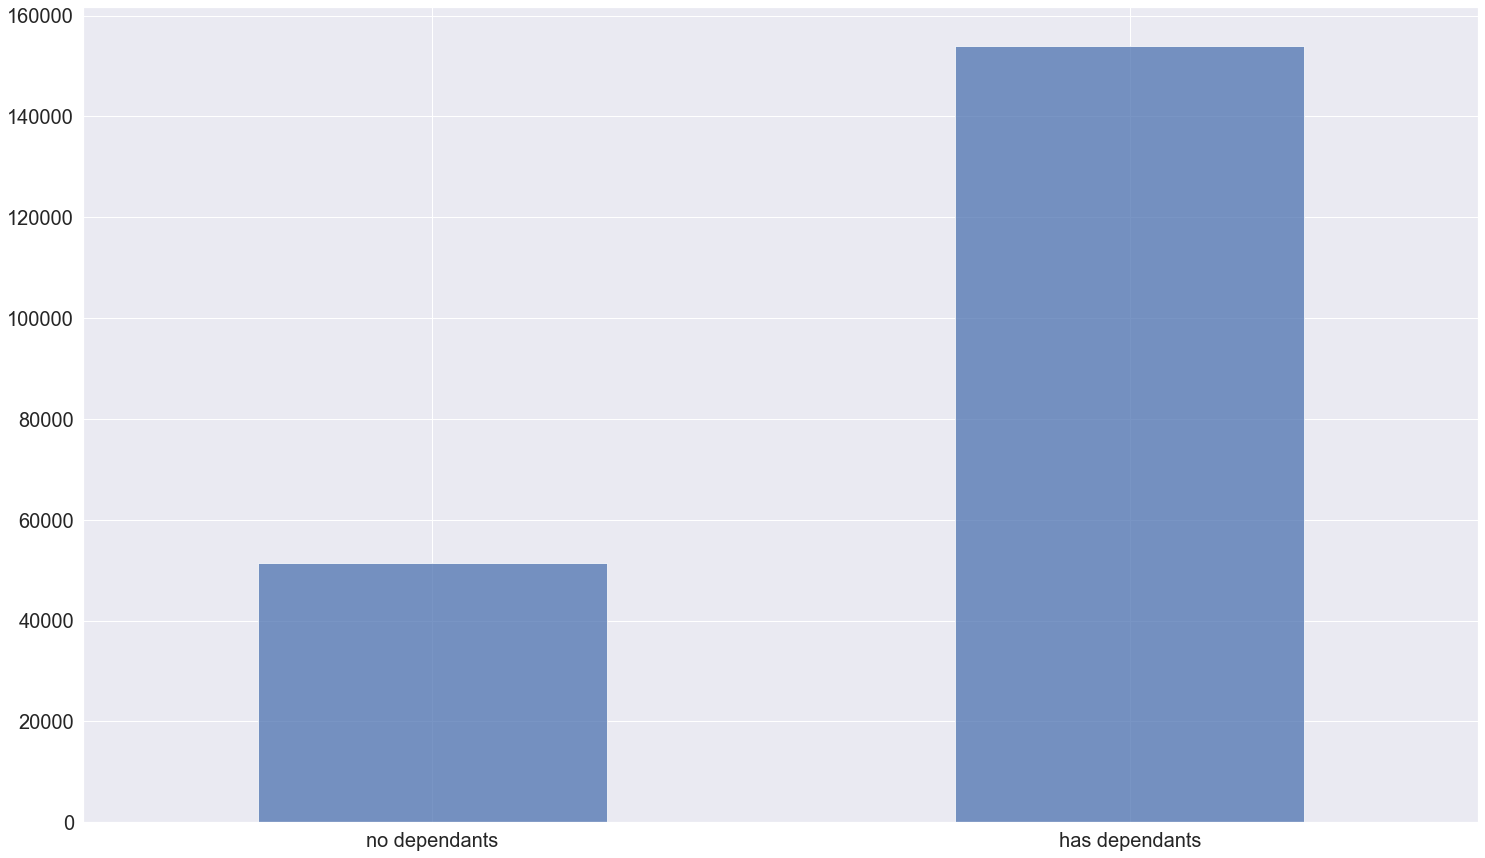

In [31]:
# Create a bar chart comparing customers who have dependants/those who do not

dependant_bar = df_no_dups['dependant_status'].value_counts().sort_values().plot(kind='bar',alpha=0.75, rot=0, fontsize=20)

# d. Department Bar Visualization

Text(0, 0.5, 'department')

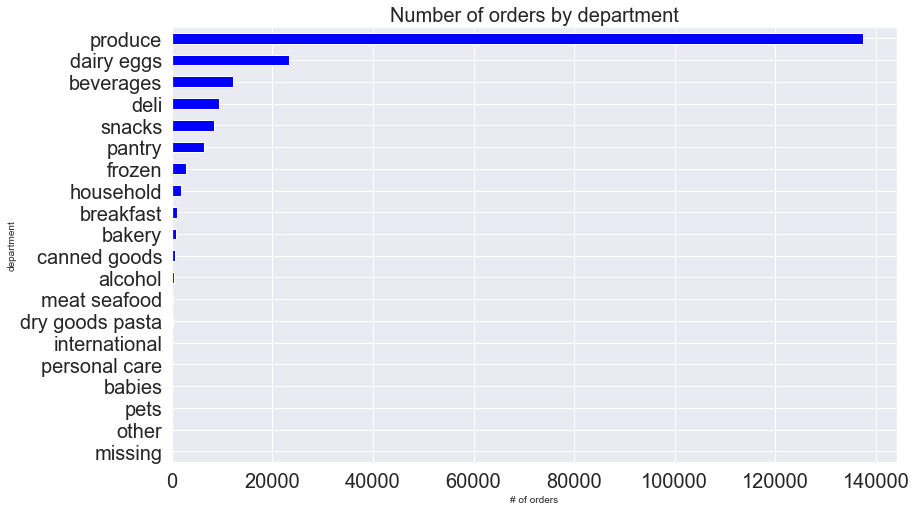

In [51]:
#Number of orders across departments

department_bar = df_no_dups['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['blue'], fontsize=20, figsize=(13,8))
plt.title('Number of orders by department', fontsize=20)
plt.xlabel('# of orders', fontsize=10)
plt.ylabel('department', fontsize=10)


<AxesSubplot:title={'center':'Distribution of orders by loyalty groups'}>

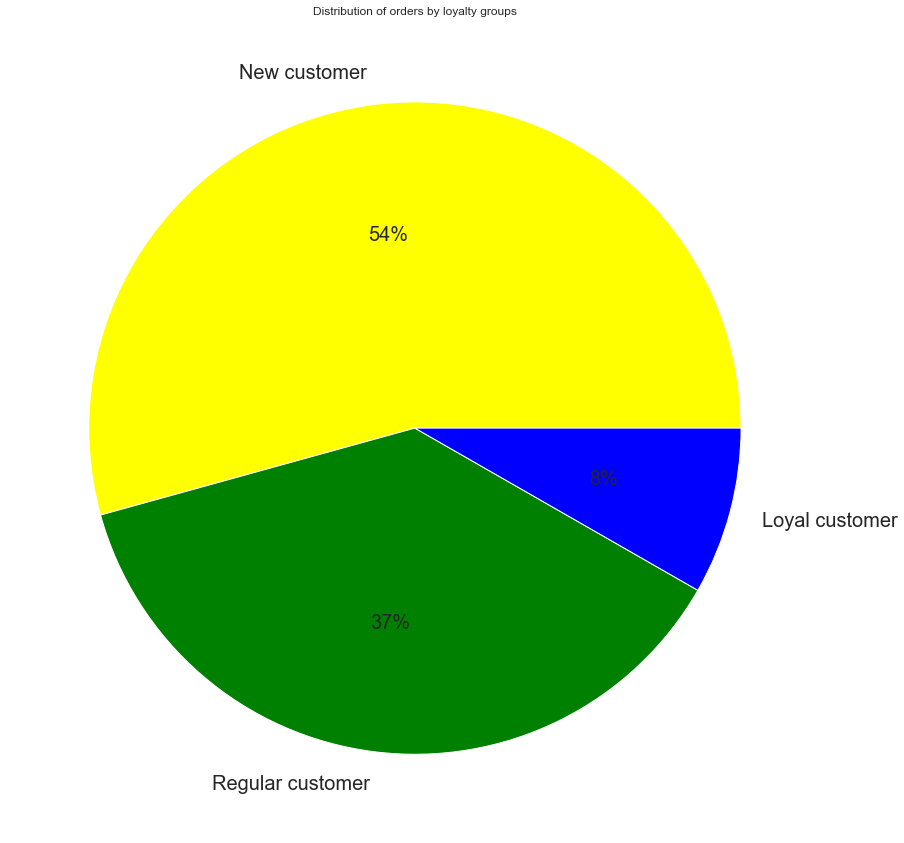

In [33]:
#Distribution of customers based on loyalty
customers_loyalty=df_no_dups['loyalty_flag'].value_counts(dropna=False)
pie_loyalty=customers_loyalty.plot.pie(title='Distribution of orders by loyalty groups', label='',autopct=('%1.f%%'), colors=['yellow','green', 'blue'], textprops={'fontsize': 20})
pie_loyalty


In [34]:
df_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205410 entries, 0 to 32404829
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       205410 non-null  int64  
 1   user_id                        205410 non-null  object 
 2   order_number                   205410 non-null  int64  
 3   orders_day_of_week             205410 non-null  int64  
 4   hour_of_day_ordered            205410 non-null  int64  
 5   days_since_prior_order         144078 non-null  float64
 6   new_customer                   205410 non-null  bool   
 7   product_id                     205410 non-null  int64  
 8   add_to_cart_order              205410 non-null  int64  
 9   reordered                      205410 non-null  int64  
 10  product_name                   205410 non-null  object 
 11  aisle_id                       205410 non-null  int64  
 12  department_id               

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [35]:
#Age-Group Profile - mean, min, and max for days since previous order and for prices
df.groupby(['age_group']).agg({'prices':['mean', 'min', 'max'], 'median_days_since_prior_order':['mean', 'min', 'max']})

prices               median_days_since_prior_order       \
                        mean  min      max                          mean  min   
age_group                                                                       
middle-aged adult  11.858992  1.0  99999.0                     10.390648  0.0   
older adult        11.966188  1.0  99999.0                     10.390420  0.0   
young adult        12.125619  1.0  99999.0                     10.412772  0.0   

                         
                    max  
age_group                
middle-aged adult  30.0  
older adult        30.0  
young adult        30.0

In [36]:
#Income-Level Profile - mean, min, and max for days since previous order and for prices
df.groupby(['income_flag']).agg({'prices':['mean', 'min', 'max'], 'median_days_since_prior_order':['mean', 'min', 'max']})

prices               median_days_since_prior_order       \
                    mean  min      max                          mean  min   
income_flag                                                                 
high income    20.176998  1.0  99999.0                     10.282966  0.0   
low income      6.697611  1.0     25.0                     11.119970  0.0   
middle income   8.884650  1.0  99999.0                     10.318370  0.0   

                     
                max  
income_flag          
high income    30.0  
low income     30.0  
middle income  30.0

In [37]:
#Number of Dependants Profile - mean, min, and max for days since previous order and for prices
df.groupby(['dependant_status']).agg({'prices':['mean', 'min', 'max'], 'median_days_since_prior_order':['mean', 'min', 'max']})

prices               median_days_since_prior_order       \
                       mean  min      max                          mean  min   
dependant_status                                                               
has dependants    11.930997  1.0  99999.0                     10.406877  0.0   
no dependants     12.117328  1.0  99999.0                     10.366554  0.0   

                        
                   max  
dependant_status        
has dependants    30.0  
no dependants     30.0

# Export Visualizations

In [38]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))
income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income_levels.png'))
dependant_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants.png'))
department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_orders.png'))

In [39]:
#export final dataset
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FINAL_dataset.pkl'))

In [40]:
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

# Extra Visualizations Needed:

Text(0, 0.5, 'Frequency of Ordering')

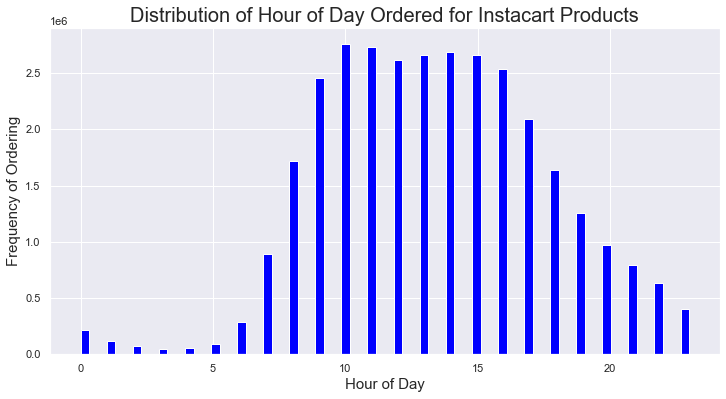

In [41]:
hist_orders = df['hour_of_day_ordered'].plot.hist(figsize=(12,6), bins = 70, color = 'blue')
plt.title("Distribution of Hour of Day Ordered for Instacart Products", fontsize=20)
plt.xlabel("Hour of Day", fontsize=15)
plt.ylabel("Frequency of Ordering", fontsize=15)

In [42]:
hist_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q1_updatedhist.png'))

Text(0, 0.5, 'Frequency of Ordering')

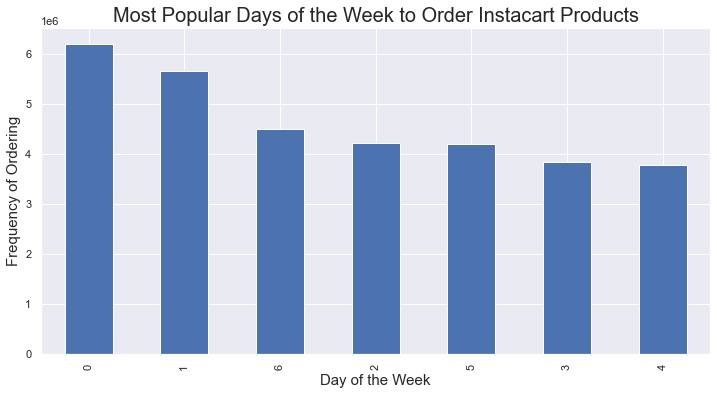

In [43]:
dayofweek_bar = df['orders_day_of_week'].value_counts().plot.bar(figsize=(12,6))
plt.title("Most Popular Days of the Week to Order Instacart Products", fontsize=20)
plt.xlabel("Day of the Week", fontsize=15)
plt.ylabel("Frequency of Ordering", fontsize=15)

In [44]:
dayofweek_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q1_updatedbar.png'))

In [54]:
#Dataframe for plotting linechart for orders
day_week=df['orders_day_of_week'].value_counts().rename_axis('day_of_week').to_frame(name='counts')
day_week=day_week.rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
day_week=day_week.reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])
day_week

,counts
day_of_week,
Saturday,6203760
Sunday,5659693
Monday,4213442
Tuesday,3840126
Wednesday,3783444
Thursday,4205384
Friday,4496126


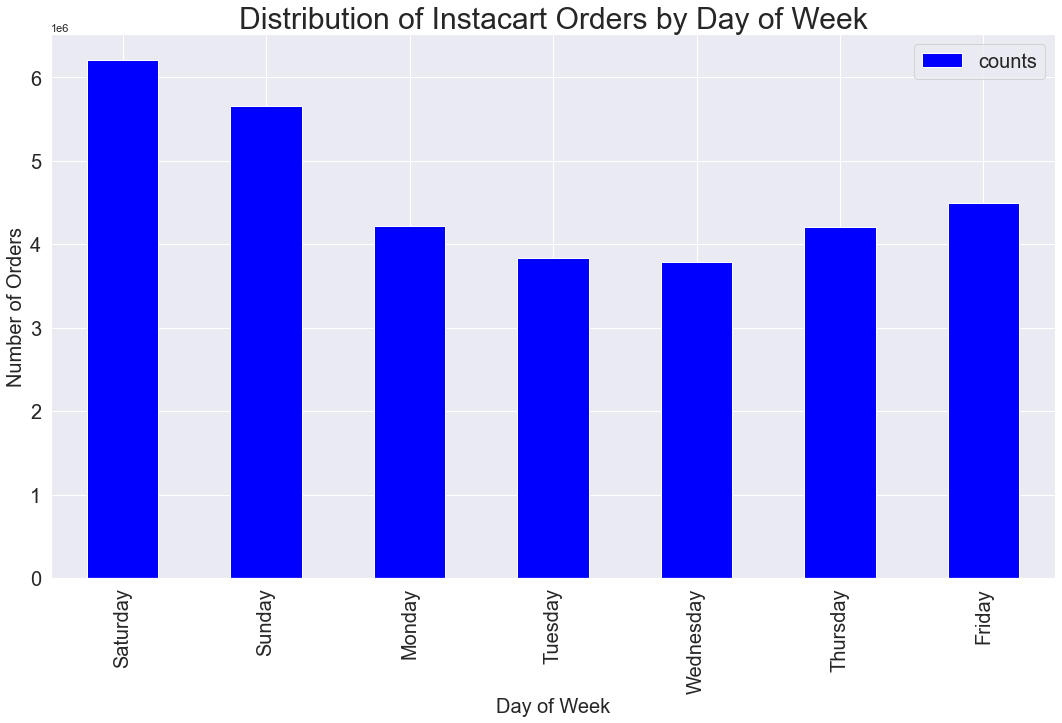

In [60]:
#Bar chart of orders by day of week
bar_order_week=day_week.plot.bar(color=['blue'], fontsize=20, figsize=(18,10))
plt.title('Distribution of Instacart Orders by Day of Week', fontsize=30)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.legend(fontsize=20)

In [61]:
bar_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q1_UPDATEDbar.png'))

In [73]:
#defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0, 0.5, 'Department')

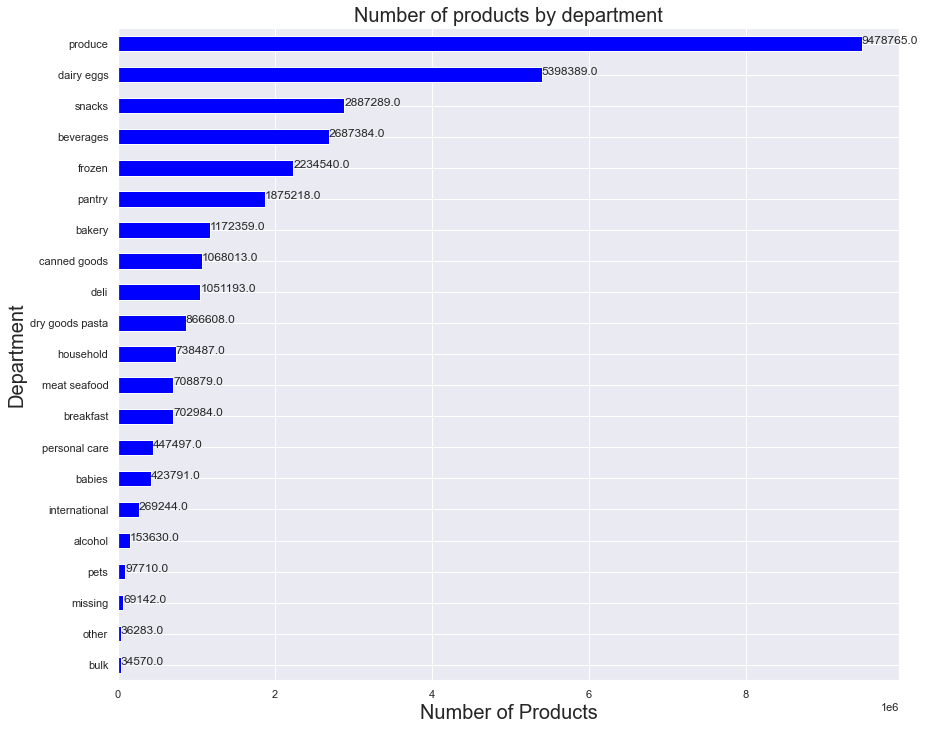

In [77]:
# bar chart showing the orders made for each department
department_bar2=df.department.value_counts().sort_values().plot(kind = 'barh',color=['blue'],figsize=[14,12])
show_values(department_bar2, "h", space=0)
plt.title('Number of products by department', fontsize=20)
plt.xlabel('Number of Products', fontsize=20)
plt.ylabel('Department', fontsize=20)


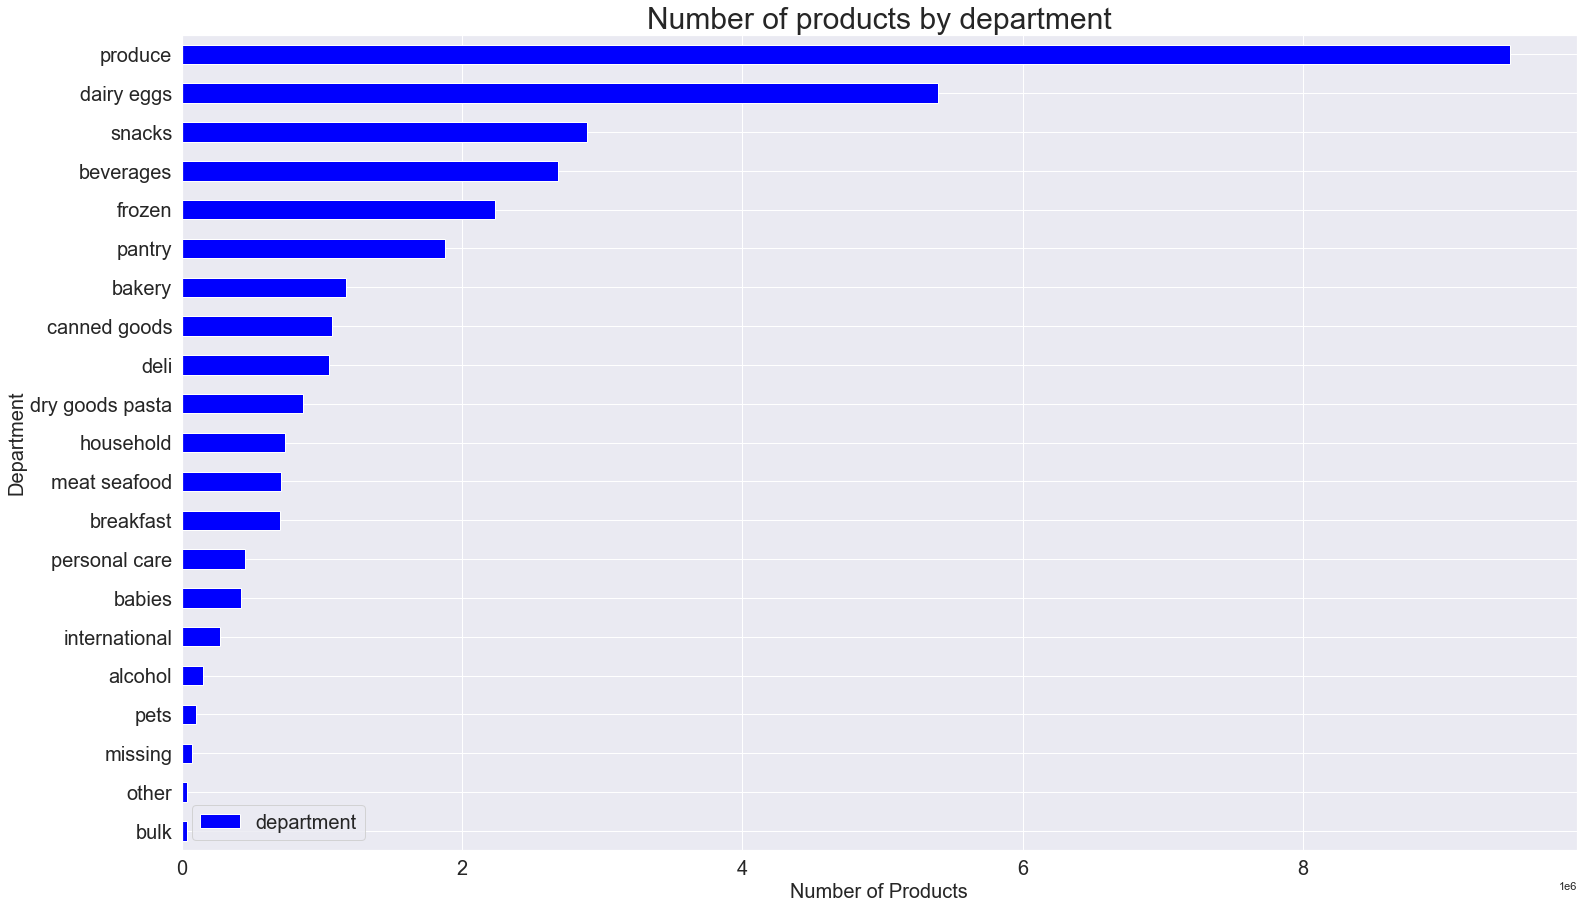

In [71]:
#Number of products by department
bar_department_orders=df['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['blue'], fontsize=20)
plt.title('Number of products by department', fontsize=30)
plt.xlabel('Number of Products', fontsize=20)
plt.ylabel('Department', fontsize=20)
plt.legend(fontsize=20)

In [72]:
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q4_departments.png'))

In [78]:
department_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q4_departmentbar2.png'))

<AxesSubplot:title={'center':'Composition of orders by loyalty group'}>

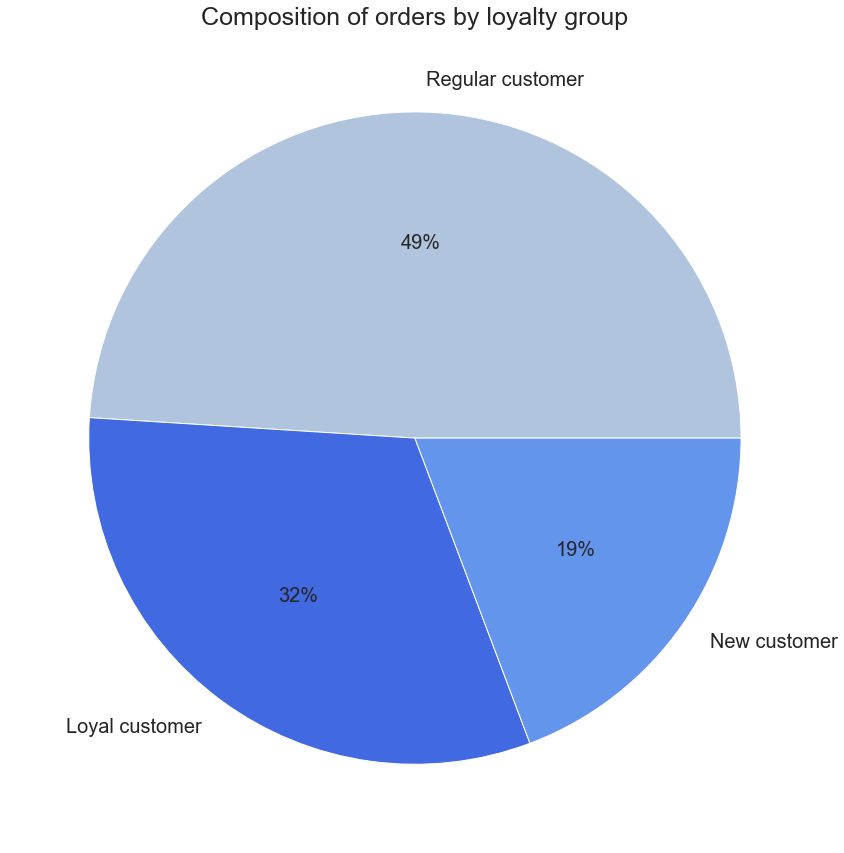

In [84]:
# Distribution of orders based on brand loyalty
customers_loyalty_orders = df['loyalty_flag'].value_counts(dropna=False)
pie_loyalty_orders=customers_loyalty_orders.plot.pie(title='Composition of orders by loyalty group', label='',autopct=('%1.f%%'), colors=['lightsteelblue','royalblue', 'cornflowerblue'], textprops={'fontsize': 20})
plt.title('Composition of orders by loyalty group', fontsize=25)
pie_loyalty_orders

In [85]:
pie_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5_loyaltypie.png'))

In [87]:
#Spending habits of customers based on loyalty brand
df_loyalty_product_range=pd.crosstab(df['price_range_loc'], df['loyalty_flag'], normalize='index')
df_loyalty_product_range=df_loyalty_product_range.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels=pd.crosstab(index=df['price_range_loc'], columns=df['loyalty_flag'])
df_loyalty_product_range_labels=df_loyalty_product_range_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels

loyalty_flag,New customer,Regular customer,Loyal customer
price_range_loc,,,
High-range product,85624,212090,119936
Low-range product,1951736,4958862,3214690
Mid-range product,4203746,10705824,6949467


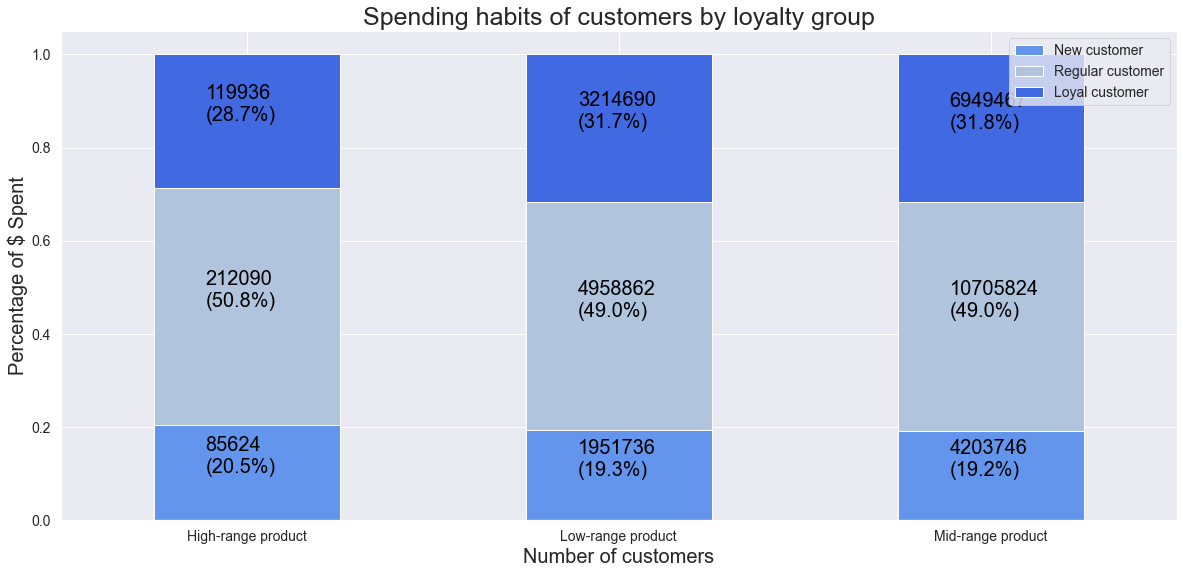

In [107]:
bar_loyalty_product_range2=df_loyalty_product_range.plot.bar(stacked=True,color=['cornflowerblue', 'lightsteelblue', 'royalblue'], fontsize=14,figsize=(20,9), rot=0)
plt.title('Spending habits of customers by loyalty group', fontsize=25)
plt.xlabel('Number of customers', fontsize=20)
plt.ylabel('Percentage of $ Spent',fontsize=20)
plt.legend(fontsize=14, loc='upper right')
for n, y in enumerate([*df_loyalty_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_loyalty_product_range.loc[y],
                                     df_loyalty_product_range_labels.loc[y],
                                        df_loyalty_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=20)

In [93]:
bar_loyalty_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q6_loyaltyhabits.png'))

In [108]:
bar_loyalty_product_range2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q6_loyaltyhabits2.png'))

In [113]:
#Distribution of orders based on region
df_region_product_range=pd.crosstab(df['region'], df['price_range_loc'], normalize='index')
df_region_product_range=df_region_product_range.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels=pd.crosstab(index=df['region'], columns=df['price_range_loc'])
df_region_product_range_labels=df_region_product_range_labels.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels

price_range_loc,Low-range product,Mid-range product,High-range product
region,,,
South,3367957,7283454,139386
West,2592444,5592554,107163
Midwest,2372112,5126736,97905
Northeast,1792775,3856293,73196


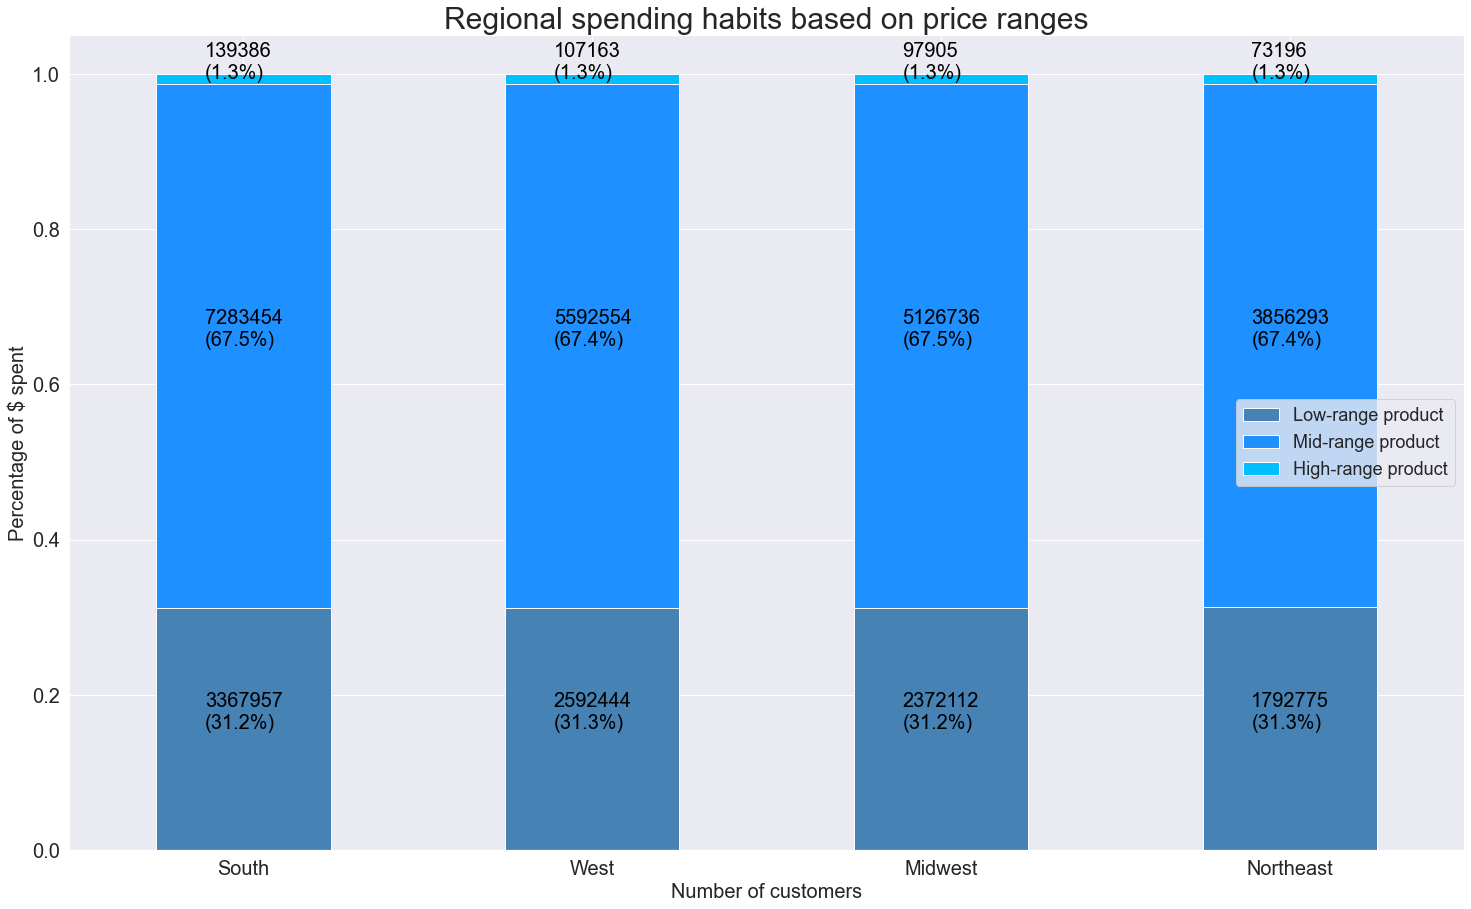

In [120]:
bar_region_product_range=df_region_product_range.plot.bar(stacked=True,color=['steelblue', 'dodgerblue','deepskyblue'], fontsize=20, rot=0)
plt.title('Regional spending habits based on price ranges', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.ylabel('Percentage of $ spent', fontsize=20)
plt.legend(fontsize=18, loc='right')
for n, y in enumerate([*df_region_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_region_product_range.loc[y],
                                     df_region_product_range_labels.loc[y],
                                        df_region_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=20)

In [121]:
bar_region_product_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q7_region_v_spending.png'))

In [140]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q9agebar'))

In [144]:
income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q10incomedist'))

In [145]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,#_of_dependants,marital_status,income,region,total_orders,activity_flag,age_group,income_flag,dependant_status,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,South,59,Regular Activity,young adult,low income,has dependants,beverages


In [146]:
#creating cross tabs to display labels and age group/departments
income_price=pd.crosstab(index=df['price_range_loc'], columns=df['income_flag'], normalize='index')
income_price=income_price.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label=pd.crosstab(index=df['price_range_loc'], columns=df['income_flag'])
income_price_label=income_price_label.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label

income_flag,low income,middle income,high income
price_range_loc,,,
Low-range product,1488830,5793348,2843110
Mid-range product,2085330,13184591,6589116
High-range product,18830,260464,138356


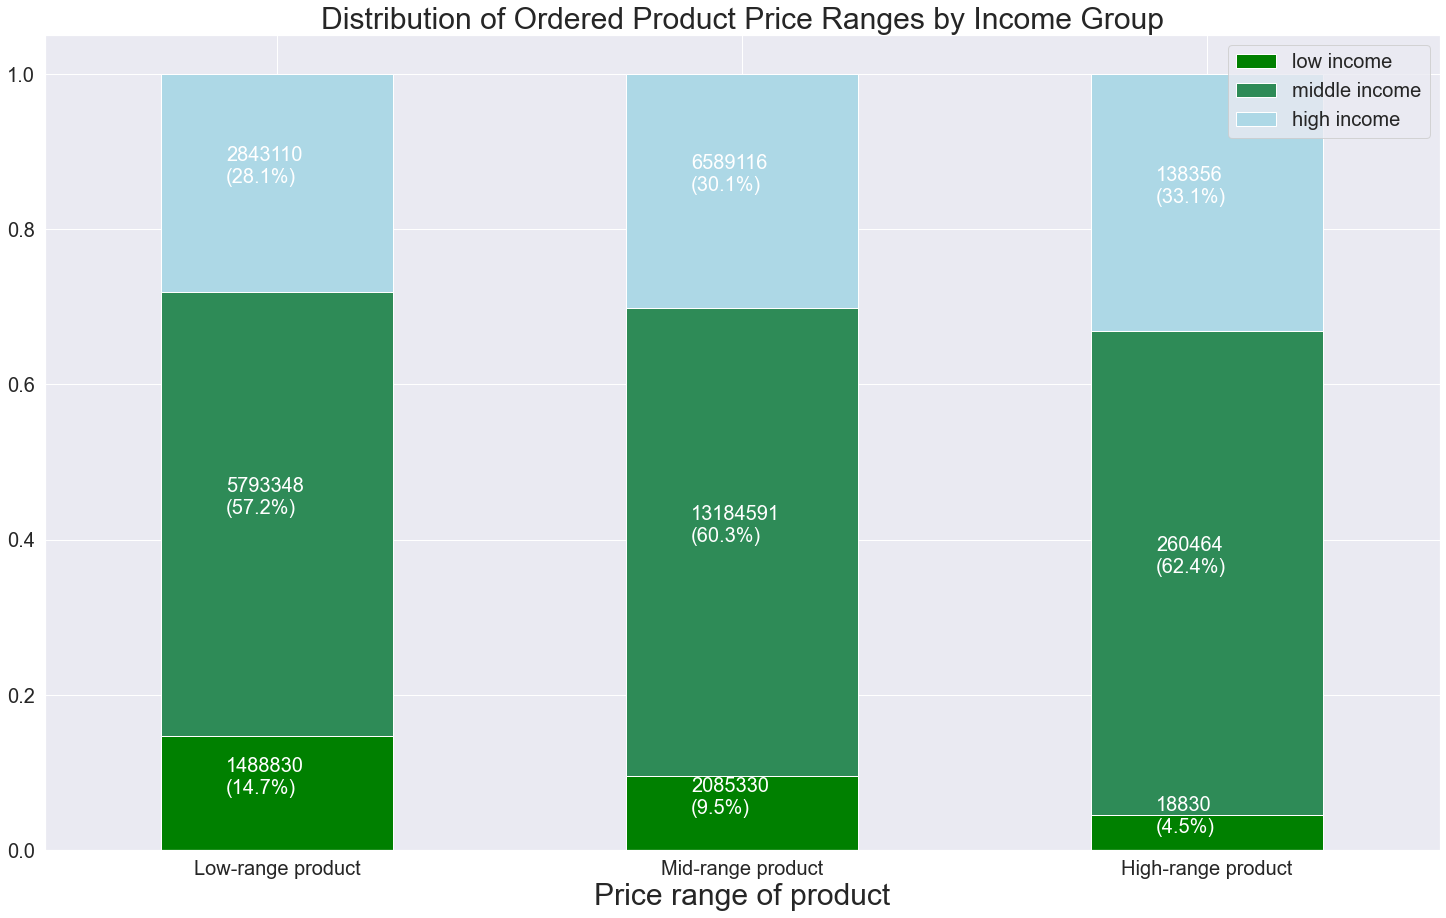

In [154]:
#Comparing level of income and price range of ordered products
bar_income_price=income_price.plot.bar(stacked=True,color=['green', 'seagreen','lightblue'], fontsize=20, rot=0)
plt.title('Distribution of Ordered Product Price Ranges by Income Group', fontsize=30)
plt.xlabel('Price range of product', fontsize=30)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*income_price.index.values]):
    for (proportion, count, x_loc) in zip(income_price.loc[y],
                                         income_price_label.loc[y],
                                         income_price.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [155]:
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q10_distlevels'))